# Machine Learning: Part 2

#### Imort libraries and data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
#Create inline
%matplotlib inline

In [3]:
#Import data
df_qb = pd.read_csv(r'C:\Users\User\Documents\Final Project\Data\Cleaned Data\final_QB.csv', encoding='latin1')
df_rb = pd.read_csv(r'C:\Users\User\Documents\Final Project\Data\Cleaned Data\final_RB.csv', encoding='latin1')
df_wr = pd.read_csv(r'C:\Users\User\Documents\Final Project\Data\Cleaned Data\final_WR.csv', encoding='latin1')
df_te = pd.read_csv(r'C:\Users\User\Documents\Final Project\Data\Cleaned Data\final_TE.csv', encoding='latin1')

#### k-means clustering analysis

#### QB

In [4]:
#View columns
df_qb.columns

Index(['Unnamed: 0', 'YEAR', 'WEEK', 'RANK', 'PLAYER', 'CMP', 'PASS ATT',
       'PCT', 'PASS YDS', 'Y/A', 'PASS TD', 'INT', 'SACKS', 'RUSH ATT',
       'RUSH YDS', 'RUSH TD', 'FL', 'G', 'FPTS'],
      dtype='object')

In [5]:
#Create subset with variables to explore
sub_qb = df_qb[['FPTS', 'CMP', 'PASS ATT', 'PASS YDS', 'PASS TD', 'INT', 'SACKS', 'RUSH ATT', 'RUSH YDS', 'RUSH TD', 'FL']]

In [6]:
#Elbow technique
num_cl = range(1, 10) #Define range of potential clusters 
kmeans = [KMeans(n_clusters=i) for i in num_cl] #Define k-means clusters in the range assigned above

In [7]:
#Create score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(sub_qb).score(sub_qb) for i in range(len(kmeans))] 

score

[-8958245.783217665,
 -3879667.1711757733,
 -2373008.301973474,
 -1765130.5844082355,
 -1437371.8841904458,
 -1214325.673710718,
 -1048510.8917078656,
 -936039.6592811558,
 -829439.1093607335]

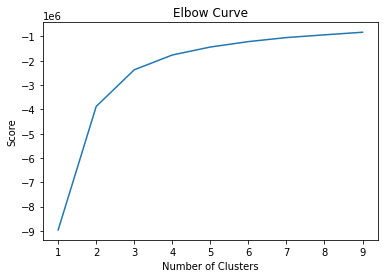

In [8]:
#Plot elbow curve 
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [9]:
#4 clusters -- point where curve "Elbows"

In [10]:
#Create k-means object

kmeans = KMeans(n_clusters = 4) 

In [11]:
#Fit k-means object to data

kmeans.fit(sub_qb)

KMeans(n_clusters=4)

In [12]:
sub_qb['Clusters'] = kmeans.fit_predict(sub_qb)

C:\Users\User\AppData\Local\Temp\ipykernel_2548\1581110402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_qb['Clusters'] = kmeans.fit_predict(sub_qb)


In [13]:
#View cluster column
sub_qb.head()

,FPTS,CMP,PASS ATT,PASS YDS,PASS TD,INT,SACKS,RUSH ATT,RUSH YDS,RUSH TD,FL,Clusters
0,34.9,30.0,39.0,360.0,5.0,0.0,0.0,3.0,5.0,0,0.0,2
1,31.5,26.0,31.0,297.0,3.0,2.0,2.0,10.0,56.0,1,0.0,0
2,25.7,27.0,41.0,313.0,4.0,2.0,1.0,6.0,12.0,0,0.0,0
3,24.7,18.0,32.0,243.0,0.0,0.0,1.0,17.0,90.0,1,0.0,3
4,23.3,26.0,34.0,279.0,3.0,0.0,0.0,4.0,1.0,0,0.0,0


In [14]:
#View cluster count
sub_qb['Clusters'].value_counts()

3    448
0    429
1    204
2    187
Name: Clusters, dtype: int64

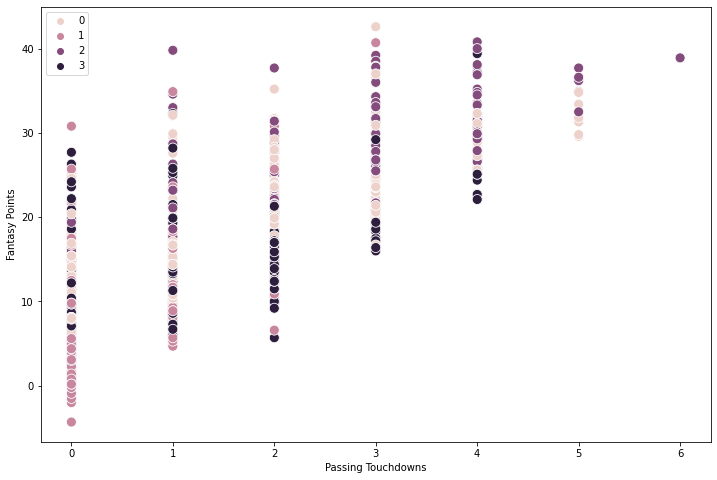

In [15]:
#Plot clusters for "Passing Touchdowns" and "Fantasy Points" 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_qb['PASS TD'], y=sub_qb['FPTS'], hue=kmeans.labels_, s=100) 


ax.grid(False) #Remove grid from background
plt.xlabel('Passing Touchdowns') #Label x-axis
plt.ylabel('Fantasy Points') #Label y-axis
plt.show()

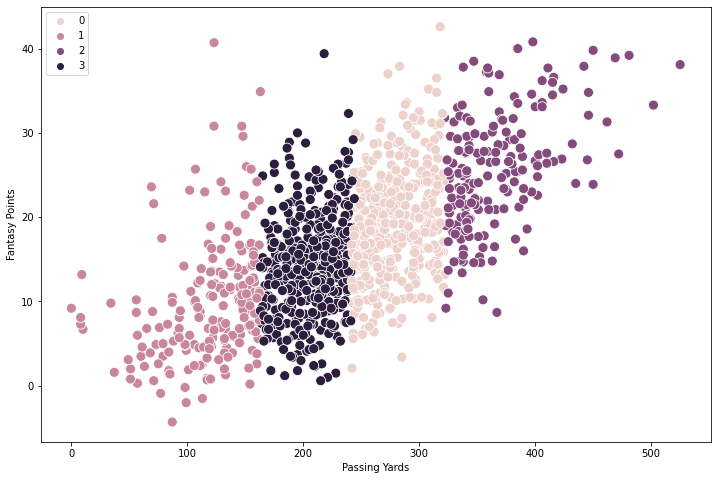

In [16]:
#Plot clusters for "Passing Yards" and "Fantasy Points" 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_qb['PASS YDS'], y=sub_qb['FPTS'], hue=kmeans.labels_, s=100) 


ax.grid(False) #Remove grid from background
plt.xlabel('Passing Yards') #Label x-axis
plt.ylabel('Fantasy Points') #Label y-axis
plt.show()

In [17]:
#Rename clusters
sub_qb.loc[sub_qb['Clusters'] == 0, 'Cluster'] = 'light pink'
sub_qb.loc[sub_qb['Clusters'] == 1, 'Cluster'] = 'dark pink'
sub_qb.loc[sub_qb['Clusters'] == 2, 'Cluster'] = 'light purple'
sub_qb.loc[sub_qb['Clusters'] == 3, 'Cluster'] = 'dark purple'

C:\Users\User\AppData\Local\Temp\ipykernel_2548\581412924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_qb.loc[sub_qb['Clusters'] == 0, 'Cluster'] = 'light pink'


In [18]:
#Clusters based on passing yards -- this makes sense as passing yards are a strong driver of quarterback fantasy points

In [19]:
#Calculate descriptive statistics
sub_qb.groupby('Cluster').agg({'PASS YDS':['mean', 'median'], 
                         'PASS TD':['mean', 'median'], 
                         'INT':['mean', 'median'],
                         'RUSH YDS':['mean', 'median'],
                         'RUSH TD':['mean', 'median']})

PASS YDS          PASS TD              INT          RUSH YDS  \
                    mean median      mean median      mean median       mean   
Cluster                                                                        
dark pink     118.686275  123.0  0.686275    1.0  0.642157    0.0  21.352941   
dark purple   206.560268  209.0  1.287946    1.0  0.707589    1.0  17.997768   
light pink    278.095571  275.0  1.783217    2.0  0.750583    1.0  15.501166   
light purple  365.524064  355.0  2.518717    3.0  0.764706    1.0  14.181818   

                      RUSH TD         
             median      mean median  
Cluster                               
dark pink      11.0  0.289216    0.0  
dark purple     9.0  0.176339    0.0  
light pink      9.0  0.170163    0.0  
light purple    8.0  0.219251    0.0

#### RB

In [20]:
#View columns
df_rb.columns

Index(['Unnamed: 0', 'YEAR', 'WEEK', 'RANK', 'PLAYER', 'ATT', 'RUSH YDS',
       'Y/A', 'LG', '20+', 'RUSH TD', 'REC', 'TGT', 'REC YDS', 'Y/R', 'REC TD',
       'FL', 'G', 'Zero PPR', 'Half PPR', 'One PPR', 'Unnamed: 20'],
      dtype='object')

In [21]:
#Create subset with variables to explore
sub_rb = df_rb[['Half PPR', 'ATT', 'RUSH YDS', 'RUSH TD', 'REC', 'TGT', 'REC YDS', 'REC TD', 'FL']]

In [22]:
#Elbow technique
num_cl = range(1, 10) #Define range of potential clusters 
kmeans = [KMeans(n_clusters=i) for i in num_cl] #Define k-means clusters in the range assigned above

In [23]:
#Create score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(sub_rb).score(sub_rb) for i in range(len(kmeans))] 

score

[-3705450.5333444406,
 -1766817.2335054209,
 -1284264.587807817,
 -906014.4738870664,
 -760609.0967947561,
 -643328.2972702323,
 -577253.0579523862,
 -507555.15161486214,
 -461605.9652189764]

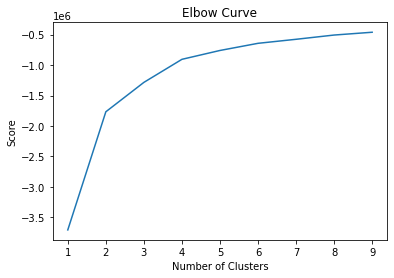

In [24]:
#Plot elbow curve 
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [25]:
#4 clusters -- point where curve "Elbows"

In [26]:
#Create k-means object

kmeans = KMeans(n_clusters = 4) 

In [27]:
#Fit k-means object to data

kmeans.fit(sub_rb)

KMeans(n_clusters=4)

In [28]:
sub_rb['Clusters'] = kmeans.fit_predict(sub_rb)

C:\Users\User\AppData\Local\Temp\ipykernel_2548\41502845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_rb['Clusters'] = kmeans.fit_predict(sub_rb)


In [29]:
#View cluster column
sub_rb.head()

,Half PPR,ATT,RUSH YDS,RUSH TD,REC,TGT,REC YDS,REC TD,FL,Clusters
0,28.9,20,51,0,10,11,128,1,0,2
1,38.2,6,58,0,13,14,117,2,0,2
2,3.0,7,32,0,1,1,-7,0,0,0
3,1.2,4,13,0,1,1,-6,0,0,0
4,2.9,8,30,0,1,2,-6,0,0,0


In [30]:
#View cluster count
sub_rb['Clusters'].value_counts()

0    1028
3     721
1     399
2     253
Name: Clusters, dtype: int64

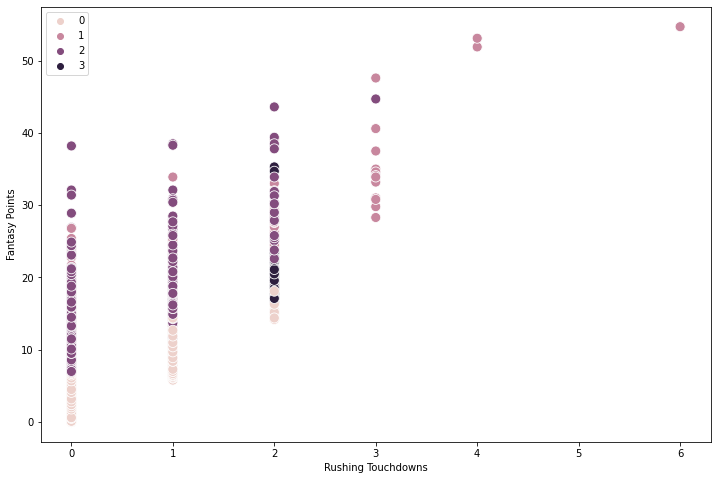

In [31]:
#Plot clusters for "Rushing Touchdowns" and "Fantasy Points" 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_rb['RUSH TD'], y=sub_rb['Half PPR'], hue=kmeans.labels_, s=100) 


ax.grid(False) #Remove grid from background
plt.xlabel('Rushing Touchdowns') #Label x-axis
plt.ylabel('Fantasy Points') #Label y-axis
plt.show()

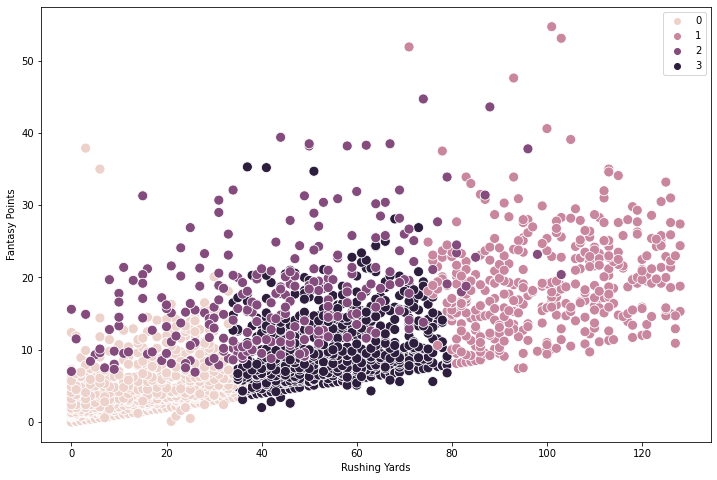

In [32]:
#Plot clusters for "Rushing Yards" and "Fantasy Points" 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_rb['RUSH YDS'], y=sub_rb['Half PPR'], hue=kmeans.labels_, s=100) 


ax.grid(False) #Remove grid from background
plt.xlabel('Rushing Yards') #Label x-axis
plt.ylabel('Fantasy Points') #Label y-axis
plt.show()

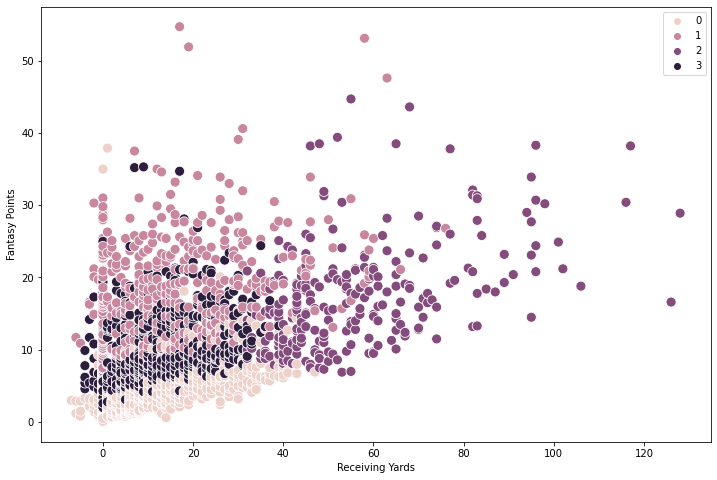

In [33]:
#Plot clusters for "Receiving Yards" and "Fantasy Points" 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_rb['REC YDS'], y=sub_rb['Half PPR'], hue=kmeans.labels_, s=100) 


ax.grid(False) #Remove grid from background
plt.xlabel('Receiving Yards') #Label x-axis
plt.ylabel('Fantasy Points') #Label y-axis
plt.show()

In [34]:
#Rename clusters
sub_rb.loc[sub_rb['Clusters'] == 0, 'Cluster'] = 'light pink'
sub_rb.loc[sub_rb['Clusters'] == 1, 'Cluster'] = 'dark pink'
sub_rb.loc[sub_rb['Clusters'] == 2, 'Cluster'] = 'light purple'
sub_rb.loc[sub_rb['Clusters'] == 3, 'Cluster'] = 'dark purple'

C:\Users\User\AppData\Local\Temp\ipykernel_2548\1003635056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_rb.loc[sub_rb['Clusters'] == 0, 'Cluster'] = 'light pink'


In [35]:
#Dark purple, light pink, and dark purple clusters based on rushing yards, dark pink based on receiving yards -- this makes sense as rushing and receiving yards are a strong driver of runningback fantasy points

In [36]:
#Calculate descriptive statistics
sub_rb.groupby('Cluster').agg({'RUSH YDS':['mean', 'median'], 
                         'RUSH TD':['mean', 'median'], 
                         'FL':['mean', 'median'],
                         'REC':['mean', 'median'],
                         'REC YDS':['mean', 'median'],
                         'REC TD':['mean', 'median']})

RUSH YDS          RUSH TD               FL              REC  \
                   mean median      mean median      mean median      mean   
Cluster                                                                      
dark pink     99.817043   99.0  0.882206    1.0  0.065163    0.0  2.250627   
dark purple   54.804438   55.0  0.374480    0.0  0.069348    0.0  1.905687   
light pink    15.447471   15.0  0.118677    0.0  0.026265    0.0  1.460117   
light purple  43.007905   44.0  0.458498    0.0  0.071146    0.0  5.600791   

                       REC YDS           REC TD         
             median       mean median      mean median  
Cluster                                                 
dark pink       2.0  15.872180   13.0  0.110276    0.0  
dark purple     2.0  11.482663   10.0  0.058252    0.0  
light pink      1.0   9.397860    6.0  0.035992    0.0  
light purple    5.0  56.581028   52.0  0.335968    0.0

#### WR

In [37]:
#View columns
df_wr.columns

Index(['Unnamed: 0', 'YEAR', 'WEEK', 'RANK', 'PLAYER', 'REC', 'TGT', 'REC YDS',
       'Y/R', 'LG', '20+', 'REC TD', 'ATT', 'RUSH YDS', 'RUSH TD', 'FL', 'G',
       'Zero PPR', 'Half PPR', 'One PPR'],
      dtype='object')

In [38]:
#Create subset with variables to explore
sub_wr = df_wr[['Half PPR', 'REC', 'TGT', 'REC YDS', 'REC TD', 'ATT', 'RUSH YDS', 'RUSH TD', 'FL']]

In [39]:
#Elbow technique
num_cl = range(1, 10) #Define range of potential clusters 
kmeans = [KMeans(n_clusters=i) for i in num_cl] #Define k-means clusters in the range assigned above

In [40]:
#Create score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(sub_wr).score(sub_wr) for i in range(len(kmeans))] 

score

[-4930995.27221888,
 -1763204.3476688173,
 -974304.3498045573,
 -659328.0453696979,
 -487815.74421260174,
 -401445.78631167364,
 -346737.9044784621,
 -310248.2055804509,
 -276610.656415317]

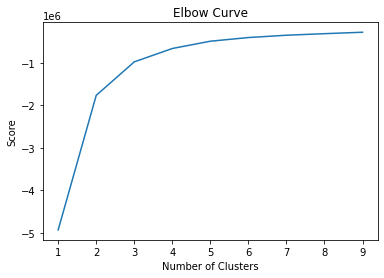

In [41]:
#Plot elbow curve 
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [42]:
#3 clusters -- point where curve "Elbows"

In [43]:
#Create k-means object

kmeans = KMeans(n_clusters = 3)

In [44]:
#Fit k-means object to data

kmeans.fit(sub_wr)

KMeans(n_clusters=3)

In [45]:
sub_wr['Clusters'] = kmeans.fit_predict(sub_wr)

C:\Users\User\AppData\Local\Temp\ipykernel_2548\2838085170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_wr['Clusters'] = kmeans.fit_predict(sub_wr)


In [46]:
#View cluster column
sub_wr.head()

,Half PPR,REC,TGT,REC YDS,REC TD,ATT,RUSH YDS,RUSH TD,FL,Clusters
0,34.9,9,11,184,2,0,0,0,0,2
1,25.1,10,17,141,1,0,0,0,0,2
2,23.9,10,16,129,1,0,0,0,0,2
3,25.3,13,15,128,1,0,0,0,0,2
4,22.2,8,9,122,1,0,0,0,0,2


In [47]:
#View cluster count
sub_wr['Clusters'].value_counts()

1    1541
0    1242
2     543
Name: Clusters, dtype: int64

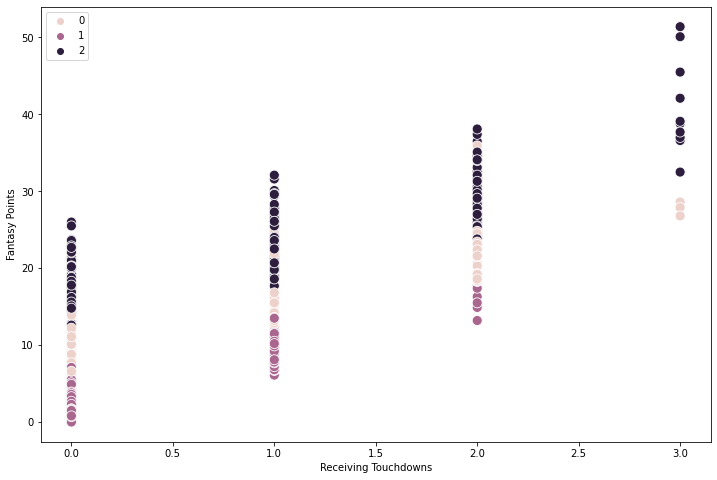

In [48]:
#Plot clusters for "Receiving Touchdowns" and "Fantasy Points" 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_wr['REC TD'], y=sub_wr['Half PPR'], hue=kmeans.labels_, s=100) 


ax.grid(False) #Remove grid from background
plt.xlabel('Receiving Touchdowns') #Label x-axis
plt.ylabel('Fantasy Points') #Label y-axis
plt.show()

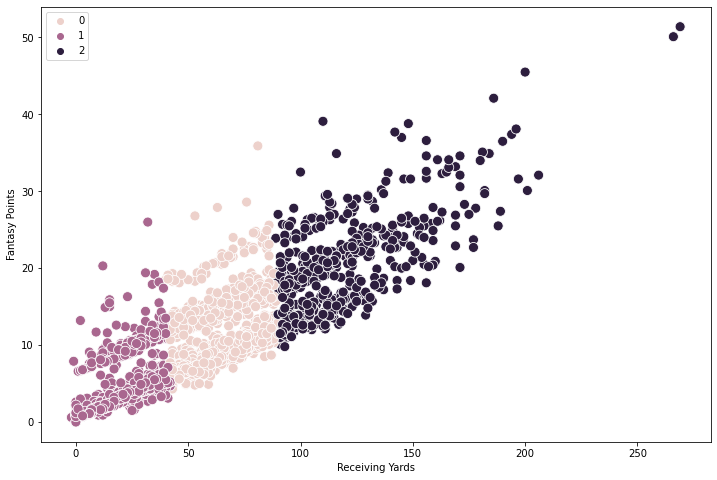

In [49]:
#Plot clusters for "Receiving Yards" and "Fantasy Points" 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_wr['REC YDS'], y=sub_wr['Half PPR'], hue=kmeans.labels_, s=100) 


ax.grid(False) #Remove grid from background
plt.xlabel('Receiving Yards') #Label x-axis
plt.ylabel('Fantasy Points') #Label y-axis
plt.show()

In [50]:
#Rename clusters
sub_wr.loc[sub_wr['Clusters'] == 0, 'Cluster'] = 'light pink'
sub_wr.loc[sub_wr['Clusters'] == 1, 'Cluster'] = 'dark pink'
sub_wr.loc[sub_wr['Clusters'] == 2, 'Cluster'] = 'dark purple'

C:\Users\User\AppData\Local\Temp\ipykernel_2548\3737456227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_wr.loc[sub_wr['Clusters'] == 0, 'Cluster'] = 'light pink'


In [51]:
#Clusters based on receiving yards -- this makes sense as receiving yards are a strong driver of wide receiver fantasy points

In [52]:
#Calculate descriptive statistics
sub_wr.groupby('Cluster').agg({'REC':['mean', 'median'],
                         'TGT':['mean', 'median'],
                         'REC YDS':['mean', 'median'],
                         'REC TD':['mean', 'median'],
                         'RUSH YDS':['mean', 'median'], 
                         'RUSH TD':['mean', 'median'], 
                         'FL':['mean', 'median']})

REC               TGT            REC YDS           REC TD  \
                 mean median       mean median        mean median      mean   
Cluster                                                                       
dark pink    2.395198    2.0   4.132382    4.0   22.012330   22.0  0.131733   
dark purple  7.388582    7.0  10.075506   10.0  117.351750  111.0  0.731123   
light pink   4.896135    5.0   7.296296    7.0   61.912238   60.5  0.388084   

                    RUSH YDS          RUSH TD               FL         
            median      mean median      mean median      mean median  
Cluster                                                                
dark pink      0.0  1.389358    0.0  0.012979    0.0  0.017521    0.0  
dark purple    1.0  1.394107    0.0  0.011050    0.0  0.036832    0.0  
light pink     0.0  1.409018    0.0  0.014493    0.0  0.034622    0.0

#### TE

In [53]:
#Change directory
os.chdir('C:\\Users\\User\\Fantasy Football Score Ranges\\04 Analysis\\TE')

In [54]:
#View columns
df_te.columns

Index(['Unnamed: 0', 'YEAR', 'WEEK', 'RANK', 'PLAYER', 'REC', 'TGT', 'REC YDS',
       'Y/R', 'LG', '20+', 'REC TD', 'ATT', 'RUSH YDS', 'RUSH TD', 'FL', 'G',
       'Zero PPR', 'Half PPR', 'One PPR'],
      dtype='object')

In [55]:
#Create subset with variables to explore
sub_te = df_te[['Half PPR', 'REC', 'TGT', 'REC YDS', 'REC TD', 'ATT', 'RUSH YDS', 'RUSH TD', 'FL']]

In [56]:
#Elbow technique
num_cl = range(1, 10) #Define range of potential clusters 
kmeans = [KMeans(n_clusters=i) for i in num_cl] #Define k-means clusters in the range assigned above

In [57]:
#Create score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(sub_te).score(sub_te) for i in range(len(kmeans))] 

score

[-936003.7060972019,
 -317705.6732538964,
 -161092.8662460508,
 -101635.21752104608,
 -71400.45725279878,
 -57507.00694417047,
 -47466.988328760825,
 -41019.550473230396,
 -37088.68222074905]

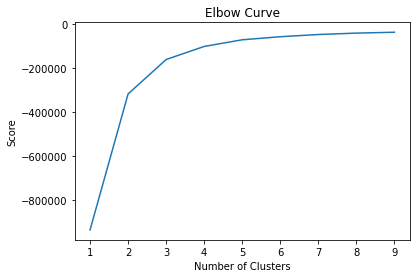

In [58]:
#Plot elbow curve 
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [59]:
#3 clusters -- point where curve "Elbows"

In [60]:
#Create k-means object

kmeans = KMeans(n_clusters = 3)

In [61]:
#Fit k-means object to data

kmeans.fit(sub_te)

KMeans(n_clusters=3)

In [62]:
sub_te['Clusters'] = kmeans.fit_predict(sub_te)

C:\Users\User\AppData\Local\Temp\ipykernel_2548\168871230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_te['Clusters'] = kmeans.fit_predict(sub_te)


In [63]:
#View cluster column
sub_te.head()

,Half PPR,REC,TGT,REC YDS,REC TD,ATT,RUSH YDS,RUSH TD,FL,Clusters
0,0.4,0,2,0,0,1,4,0,0,1
1,0.0,0,0,0,0,0,0,0,0,1
2,0.5,0,0,0,0,1,5,0,0,1
3,0.4,0,2,0,0,1,4,0,0,1
4,0.6,1,1,1,0,0,0,0,0,1


In [64]:
#View cluster count
sub_te['Clusters'].value_counts()

1    682
2    482
0    194
Name: Clusters, dtype: int64

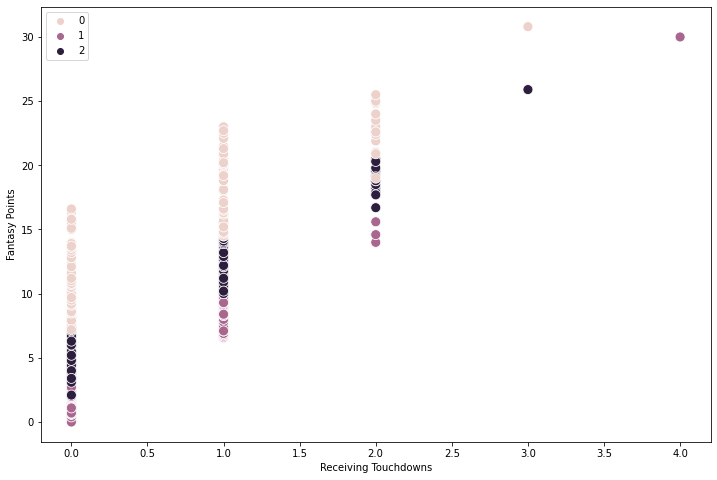

In [65]:
#Plot clusters for "Receiving Touchdowns" and "Fantasy Points" 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_te['REC TD'], y=sub_te['Half PPR'], hue=kmeans.labels_, s=100) 


ax.grid(False) #Remove grid from background
plt.xlabel('Receiving Touchdowns') #Label x-axis
plt.ylabel('Fantasy Points') #Label y-axis
plt.show()

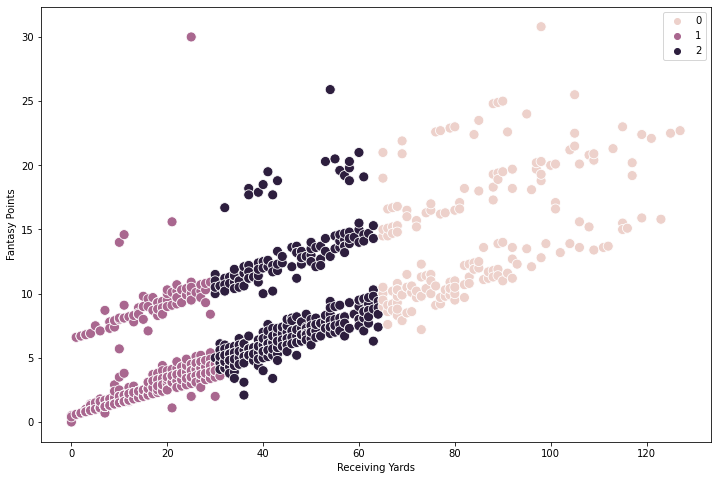

<Figure size 432x288 with 0 Axes>

In [71]:
#Plot clusters for "Receiving Yards" and "Fantasy Points" 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_te['REC YDS'], y=sub_te['Half PPR'], hue=kmeans.labels_, s=100) 


ax.grid(False) #Remove grid from background
plt.xlabel('Receiving Yards') #Label x-axis
plt.ylabel('Fantasy Points') #Label y-axis
plt.show()
plt.savefig("TE Receiiving Yards Cluster.png")

In [67]:
#Rename clusters
sub_te.loc[sub_te['Clusters'] == 0, 'Cluster'] = 'light pink'
sub_te.loc[sub_te['Clusters'] == 1, 'Cluster'] = 'dark pink'
sub_te.loc[sub_te['Clusters'] == 2, 'Cluster'] = 'dark purple'

C:\Users\User\AppData\Local\Temp\ipykernel_2548\2774757297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_te.loc[sub_te['Clusters'] == 0, 'Cluster'] = 'light pink'


In [68]:
#Clusters based on receiving yards -- this makes sense as receiving yards are a strong driver of tight end fantasy points
#Within clusters, we see trend lines starting around 0, 6, and 12 fantasy points, showing that touchdowns are also a strong driver of tight end fantasy points

In [73]:
#Calculate descriptive statistics
sub_te.groupby('Cluster').agg({'Half PPR':['mean', 'median'],
                         'REC':['mean', 'median'],
                         'TGT':['mean', 'median'],
                         'REC YDS':['mean', 'median'],
                         'REC TD':['mean', 'median'],
                         'RUSH YDS':['mean', 'median'], 
                         'RUSH TD':['mean', 'median'], 
                         'FL':['mean', 'median']})

Half PPR              REC              TGT           REC YDS  \
                  mean median      mean median      mean median       mean   
Cluster                                                                      
dark pink     3.584604    2.8  1.964809    2.0  3.133431    3.0  15.857771   
dark purple   8.327178    7.1  4.045643    4.0  5.649378    5.0  44.537344   
light pink   14.373196   13.0  6.288660    6.0  8.345361    8.0  83.407216   

                      REC TD         RUSH YDS          RUSH TD         \
            median      mean median      mean median      mean median   
Cluster                                                                 
dark pink     16.0  0.164223    0.0  0.105572    0.0  0.007331    0.0   
dark purple   43.0  0.315353    0.0  0.124481    0.0  0.000000    0.0   
light pink    80.0  0.484536    0.0  0.118557    0.0  0.005155    0.0   

                   FL         
                 mean median  
Cluster                       
dark pink    0.011730    0.0  
dark purple  0.026971    0.0  
light pink   0.030928    0.0

In [70]:
#These results could be useful in constructing player profiles and projecting scoring in future games